<a href="https://colab.research.google.com/github/Joe-rini/nlp-specialization-colab/blob/main/C1W3_L3_StretchTopics_PCA_VisualExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1W3_L3 Bonus: PCA Explained Variance, Covariance Matrix, and t-SNE

Welcome to this optional deep-dive into **stretch topics** for PCA.
If you enjoyed projecting and reconstructing toy data, you'll love this! This notebook covers:

- What the PCA eigenvalues really mean (explained variance)
- What the covariance matrix looks like for toy 3D points
- How PCA compares to t-SNE for visualization

This builds on your favorite **toy animal vector example** and adds pedagogical explanations at each step.

:## 🧪 Toy Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np

word_to_vec = {
    'lion': np.array([3, 1, 2]),
    'tiger': np.array([2.5, 1.2, 2.1]),
    'housecat': np.array([1, 0.5, 1]),
    'dog': np.array([2, 0.7, 1.5])
}

X = np.array(list(word_to_vec.values()))
labels = list(word_to_vec.keys())

Let's put the data in a table and look at average and standard deviation

In [4]:
# Convert to DataFrame
df = pd.DataFrame(word_to_vec).T
df.columns = ['Feature 1', 'Feature 2', 'Feature 3']
df.index.name = 'Animal'

# Compute average and standard deviation
average = df.mean()
std_dev = df.std()

# Append rows
df.loc['Average'] = average
df.loc['Std Dev'] = std_dev

df

,Feature 1,Feature 2,Feature 3
Animal,,,
lion,3.000000,1.000000,2.000000
tiger,2.500000,1.200000,2.100000
housecat,1.000000,0.500000,1.000000
dog,2.000000,0.700000,1.500000
Average,2.125000,0.850000,1.650000
Std Dev,0.853913,0.310913,0.506623


## 🧮 Step 1: Visualize Covariance Matrix of These Points
This matrix tells us how much each dimension varies **with** the others.

In [6]:
# Center the data
X_centered = X - X.mean(axis=0)
cov_matrix = np.cov(X_centered.T)

# Turn it into a DataFrame for pretty printing
cov_df = pd.DataFrame(cov_matrix, columns=['x1', 'x2', 'x3'], index=['x1', 'x2', 'x3'])
cov_df

,x1,x2,x3
x1,0.729167,0.225000,0.408333
x2,0.225000,0.096667,0.153333
x3,0.408333,0.153333,0.256667


## 📊 Step 2: PCA with Explained Variance Plot

Explained variance ratio: [9.63171133e-01 3.65750385e-02 2.53828491e-04]


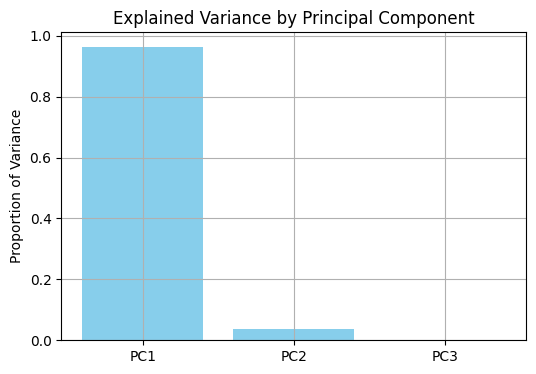

In [7]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.bar(["PC1", "PC2", "PC3"], pca.explained_variance_ratio_, color='skyblue')
plt.title("Explained Variance by Principal Component")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()

## 🧭 Step 3: Visualize PCA Projection (2D)

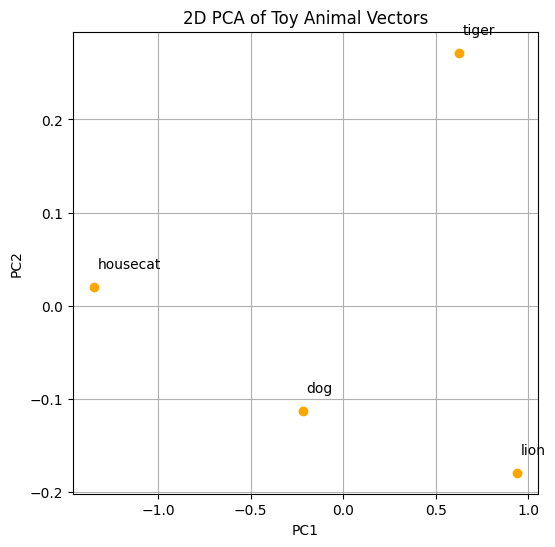

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='orange')
for i, label in enumerate(labels):
    plt.text(X_pca[i,0]+0.02, X_pca[i,1]+0.02, label)
plt.title("2D PCA of Toy Animal Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## 🌌 Step 4: t-SNE Projection for Comparison
PCA is **linear**, but t-SNE is **non-linear** and great for capturing clusters.
Try it on the same data:

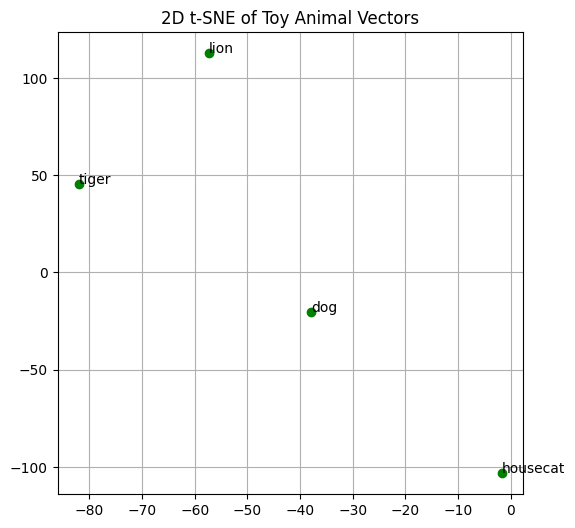

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c='green')
for i, label in enumerate(labels):
    plt.text(X_tsne[i,0]+0.02, X_tsne[i,1]+0.02, label)
plt.title("2D t-SNE of Toy Animal Vectors")
plt.grid(True)
plt.show()

## 🧾 Summary
- You learned how to compute and inspect the **covariance matrix**
- You visualized **how much variance** is captured by each PCA component
- You compared **PCA** vs **t-SNE** for low-dimensional projections

This strengthens your geometric intuition about embeddings and dimension reduction.